<a href="https://colab.research.google.com/github/rohanailoni/Tech_week/blob/main/Copy_of_EXP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the first important modules pandas csv numpy and pickle**

* Matplotlib for ploting graphs
* Seaborn is a libary which is build upon matplotlib can return plots which is more attractive and interactive
* Pickle for importing python functions
* collections for conveting the arrays into dictionary


In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import collections

**Before most important thing is to pull dataset form github colab has a inbuild function is wget which can import functions**

In [ ]:
url = 'https://raw.githubusercontent.com/rohanailoni/Tech_week/master/cleaned_data/emotion_data_prep.csv'
!wget $url

--2021-11-22 04:42:23--  https://raw.githubusercontent.com/rohanailoni/Tech_week/master/cleaned_data/emotion_data_prep.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3308292 (3.2M) [text/plain]
Saving to: ‘emotion_data_prep.csv’

emotion_data_prep.c 100%[===================>]   3.15M  --.-KB/s    in 0.08s   

2021-11-22 04:42:23 (42.1 MB/s) - ‘emotion_data_prep.csv’ saved [3308292/3308292]



**We Will read the csv using pandas which convets the byte stream from the file to DataFrame which is an Pandas inbuild Object**

*There is also a Possibility that the some csv files will be now decoded using UTF-8 So it is safer to use UTF-8 for large dataset so that while trianing it deosnt causes **NAN** Error*


In [ ]:
data_train = pd.read_csv('/content/emotion_data_prep.csv', sep=',', encoding='utf-8')
print("Dataset shape:",data_train.shape)

Dataset shape: (62014, 2)


**Now this how our output have been index(cleaned )**

> 0----neutral

> 1----Happy

> 2 ----Sad

> 3-----love

> 4-----anger



In [ ]:
data_train.iloc[:,1].value_counts()

1    22021
2    14844
0     9643
3     8801
4     6705
Name: 3, dtype: int64

**From The above we can see that the Now using seaborn barplot Let us plot using Emotions count in Dataset**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


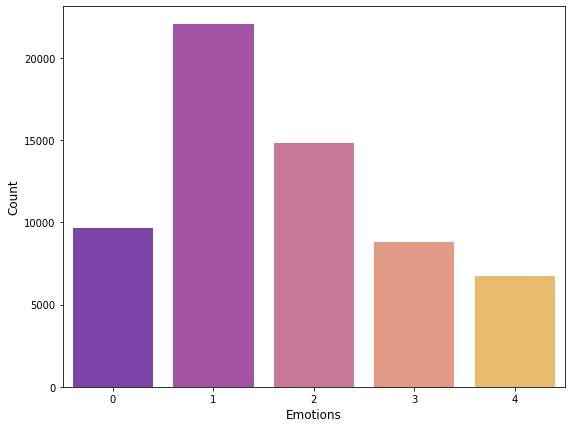

In [ ]:
count  = data_train.iloc[:,1].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="plasma")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()
# 0 = neutral
# 1 = happy
# 2 = sad
# 3 = love
# 4 = anger

**For Verification we need to divide out data into 2 sets**<br/>
> X_train contains all a part of data_train

> y_train contains labels of the X_train

> x_val will be remaining Array contains fro validation of our models

> y_val will be labels for x_val


In [ ]:
skip=49611
X_train = data_train.iloc[:,0][:skip]

y_train = data_train.iloc[:,-1][:skip]

X_val = data_train.iloc[:,0][skip+1:]

y_val = data_train.iloc[:,-1][skip+1:]

**First All the models take inputs as the Numbers so we needed to convert our Sentences into numbers but the numbers Directly converted into numbers because each word lose significant with each other and inturn our models cannot identify Significace between different Sentences**

<br/>
<br/>

*There are two Methods of conveting the text into 2D Vectors(Embeddings Is discussing in the next Session):-*


> Tf-IDF Vectrization

>Count Vectoization

**Sklearn Provides Tf-idf vectorization function to convert directly into vectors**

*So we will be importing it from sklearn.feature_extraction and in text module*


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))

X_train_tfidf = tfidf.fit_transform(X_train.astype('U'))

X_val_tfidf = tfidf.fit_transform(X_val.astype('U'))


print(tfidf.vocabulary_)

{'go': 336, 'make': 539, 'well': 951, 'soo': 804, 'yeah': 989, 'funny': 317, 'people': 642, 'family': 260, 'book': 87, 'reading': 693, 'love': 527, 'quick': 685, 'chance': 117, 'lol': 519, 'sad': 729, 'start': 818, 'girl': 326, 'day': 177, 'sister': 779, 'bad': 54, 'time': 881, 'wow': 982, 'good': 345, 'twt': 910, 'merry': 558, 'christmas': 125, 'army': 34, 'jim': 452, 'twt merry': 911, 'merry christmas': 559, 'christmas army': 126, 'army jim': 35, 'jim merry': 453, 'twt merry christmas': 912, 'merry christmas army': 560, 'christmas army jim': 127, 'army jim merry': 36, 'jim merry christmas': 454, 'haha': 362, 'play': 658, 'fall': 259, 'boy': 92, 'bar': 57, 'full': 315, 'old': 619, 'need': 599, 'would': 981, 'ask': 40, 'really': 698, 'cut': 168, 'hang': 368, 'tomorrow': 886, 'sb': 736, 'surprise': 843, 'ver': 924, 'justin': 470, 'josh': 459, 'sejun': 756, 'sb christmas': 737, 'christmas surprise': 131, 'surprise family': 846, 'family ver': 261, 'ver merry': 925, 'christmas sb': 129, 's

In [ ]:
bow = tfidf.fit_transform(data_train.iloc[:,0].astype('U'))


**Now we will plot what we have done in the Above transform with word vs frequency**

* first we will convert it into dictionary so that we will get word : frequecy data

* We will take top 30 freqeucy and convert into Bar Plot


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


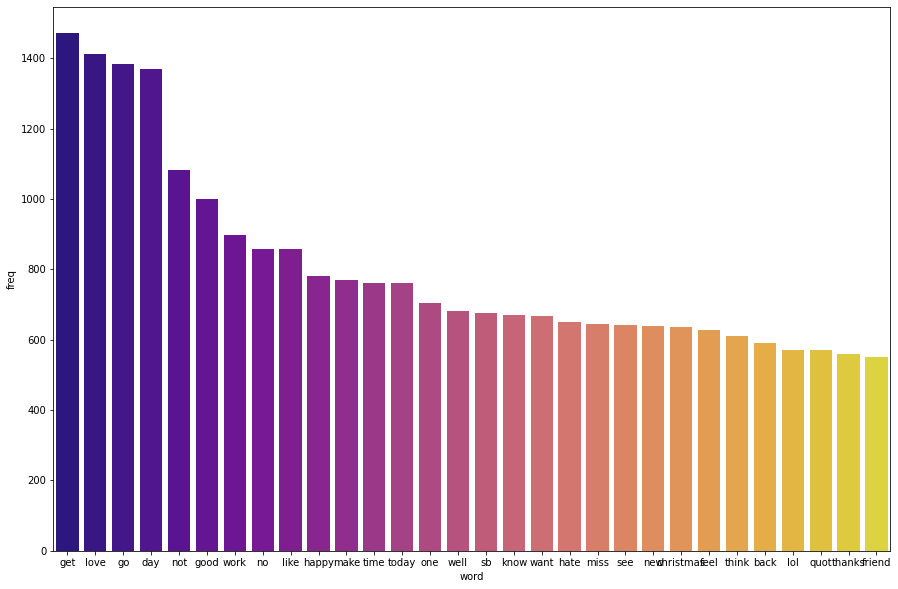

In [ ]:
word_freq = dict(zip(tfidf.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))

word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")

plt.show();

**Sklearn Provides Tf-idf vectorization function to convert directly into vectors**

*So we will be importing it from sklearn.feature_extraction and in text module*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data_train.iloc[:,0].astype('U'))
X_train_count =  count_vect.transform(X_train.astype('U'))
X_val_count =  count_vect.transform(X_val.astype('U'))

In [ ]:
count_vect.vocabulary_

(62014, 32778)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


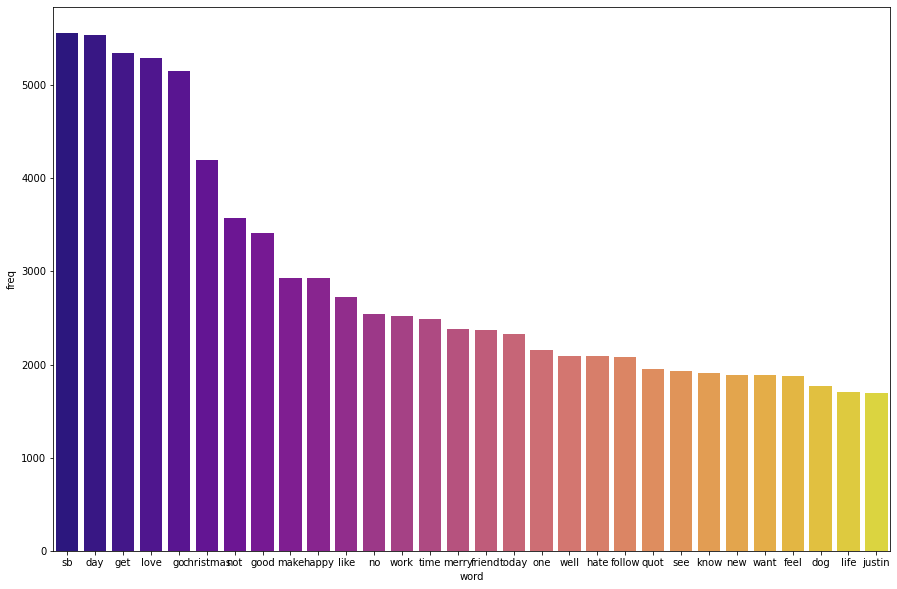

In [ ]:
bow = count_vect.fit_transform(data_train.iloc[:,0].astype('U'))
print(bow.shape)
word_freq = dict(zip(count_vect.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")
plt.show();

# Building models using different classifiers (TF-IDF vectorizer)
##Model 1: Multinomial Naive Bayes Classifier text

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes tfidf accuracy 0.3853410740203193


##Model 2: Linear SVM


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))

svm using tfidf accuracy 0.3802612481857765


# Model 3: logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(C=1, max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))

log reg tfidf accuracy 0.39461377197226255


In [ ]:
########COUNT VECTOR

##Building models using different classifiers (Count vectorizer)
#Model 1: Multinomial Naive Bayes Classifier

In [ ]:
nb1 = MultinomialNB()
nb1.fit(X_train_count, y_train)
y_pred = nb1.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes count vectors accuracy 0.584663763909047


##Model 2: Logistic Regression

In [ ]:
logreg1 = LogisticRegression(C=1, max_iter=500)
logreg1.fit(X_train_count, y_train)
y_pred = logreg1.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))

log reg count vectors accuracy 0.6248185776487664


##Model 3: Linear SVM

In [ ]:
lsvm1 = SGDClassifier(alpha=0.001, random_state=5, max_iter=2, tol=None)
lsvm1.fit(X_train_count, y_train)
y_pred = lsvm1.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))

lsvm using count vectors accuracy 0.620061280438639


In [ ]:
# !wget http://nlp.stanford.edu/data/glove.twitter.27B.zip